In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 150
plt.style.use('ggplot')

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("husl", 8));
sns.mpl.rc("figure", figsize=(10,4))
sns.set_style('whitegrid')

In [2]:
cd ../

/Users/toz/Documents/workspace/Circle-of-Doom


In [3]:
#read the data -> pn: published news, tn: tweeted news
pn = pd.read_csv('data/published-no-story.csv',encoding='utf-8')
tn = pd.read_csv('data/tw-liwc-cat.csv',encoding='utf-8')
outlets = sorted(pn['outlet'].unique().tolist())
pn['sp'] = pn['posemo']-pn['negemo']
tn['sp'] = tn['posemo']-tn['negemo']
tn['sp_t'] = tn['posemo_t']-tn['negemo_t']

In [10]:
# Retweeted News (NOTE: THIS TAKES ~ 3min 32s)
%timeit -n1 -r1 rn = pd.concat([pd.DataFrame([row[1]]*int(1 + row[1].rt/50)) for row in tn.iterrows()])

1 loops, best of 1: 3min 32s per loop


In [11]:
#mean, median, max of retweets per outlet
pd.pivot_table(tn,index=['outlet'],values=['rt'],aggfunc=[np.mean,np.median,max]).rename(columns={'rt':'Retweet'})

,mean,median,max
,Retweet,Retweet,Retweet
outlet,,,
ABC,167.968977,101.0,5201
AP,89.845301,70.0,862
CBSNews,72.674347,49.0,2458
CNN,385.429577,234.5,7752
FoxNews,135.514667,89.0,3122
NBCNews,85.501179,55.0,11031
NYT,139.756197,84.0,8917
WPOST,83.014623,59.0,3683


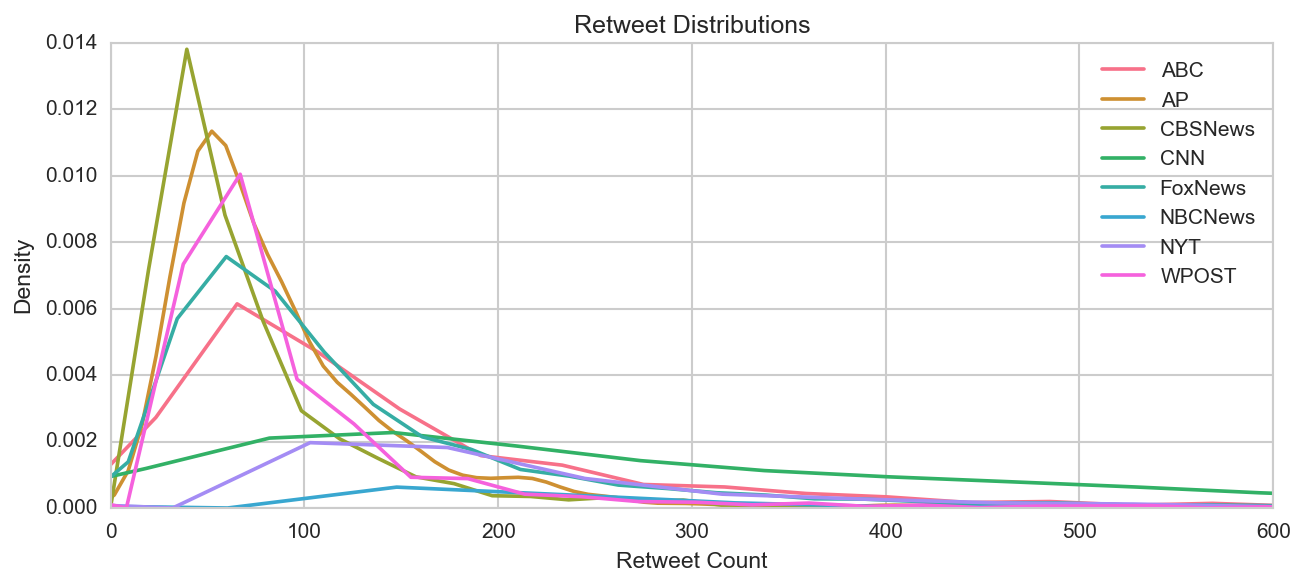

In [12]:
# density plot of retweets
ax = [sns.kdeplot(tn[tn.outlet==o].rt,label=o) for o in outlets][0]
ax.set(xlim=(0,600))
ax.set_title('Retweet Distributions')
ax.set_xlabel('Retweet Count')
ax.set_ylabel('Density');

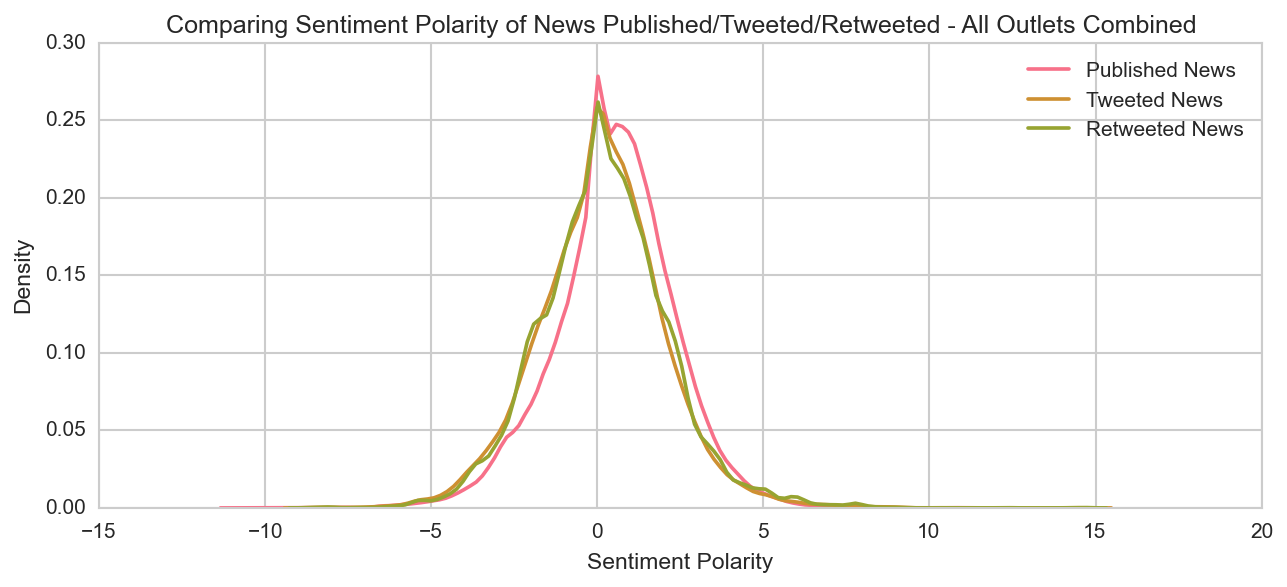

In [13]:
# sentiment polarities [posemo - negemo] of news 
c = 'sp'
sns.kdeplot(pn[c],label='Published News')
sns.kdeplot(tn[c],label='Tweeted News')
ax = sns.kdeplot(rn[c],label='Retweeted News')
ax.set_title('Comparing Sentiment Polarity of News Published/Tweeted/Retweeted - All Outlets Combined')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
plt.savefig('figs/sentiment-comparison-published-tweeted-retweeted.png',bbox_inches='tight')

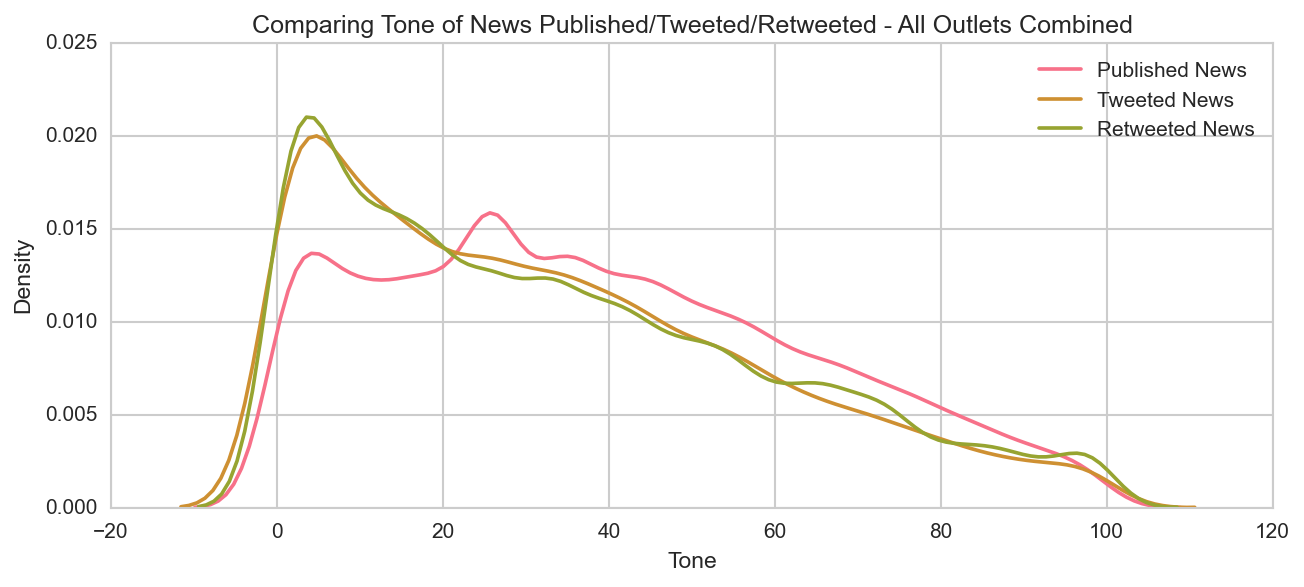

In [14]:
sns.kdeplot(pn['Tone'],label='Published News')#.set(xlim=splim)
sns.kdeplot(tn['Tone'],label='Tweeted News')#.set(xlim=splim)
ax = sns.kdeplot(rn['Tone'],label='Retweeted News')
ax.set_title('Comparing Tone of News Published/Tweeted/Retweeted - All Outlets Combined')
ax.set_xlabel('Tone')
ax.set_ylabel('Density')
plt.savefig('figs/tone-comparison-published-tweeted-retweeted.png',bbox_inches='tight')

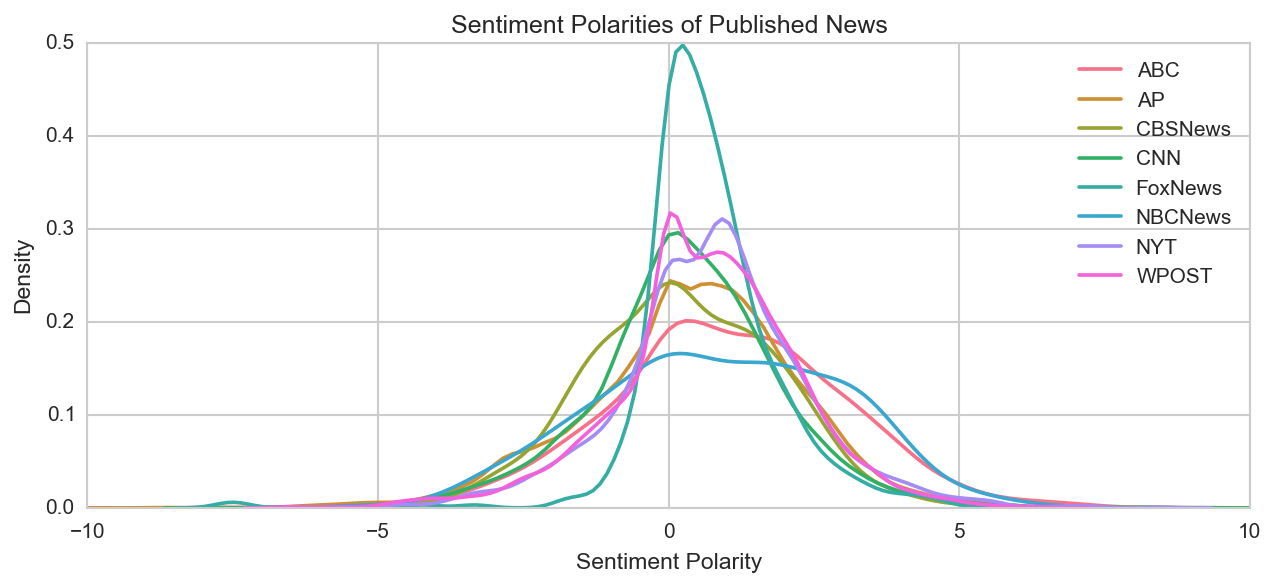

In [16]:
df = pn
ax = [sns.kdeplot(df[df['outlet']==o]['sp'],label=o) for o in outlets][0]
ax.set(xlim=(-10,10)) # = sns.kdeplot(df['sp'],label='Avg',color='black')
ax.set_title('Sentiment Polarities of Published News')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
plt.savefig('figs/sentiment-published.png',bbox_inches='tight')

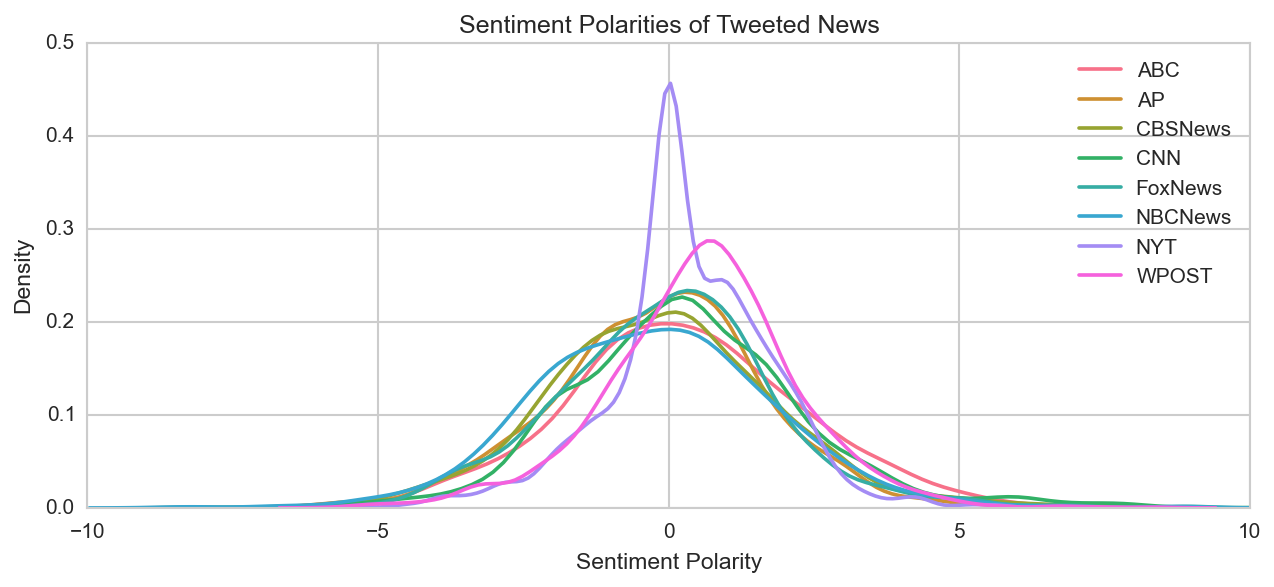

In [17]:
df = tn
ax = [sns.kdeplot(df[df['outlet']==o]['sp'],label=o) for o in outlets][0]
ax.set(xlim=(-10,10)) # = sns.kdeplot(df['sp'],label='Avg',color='black')
ax.set_title('Sentiment Polarities of Tweeted News')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
plt.savefig('figs/sentiment-tweeted.png',bbox_inches='tight')

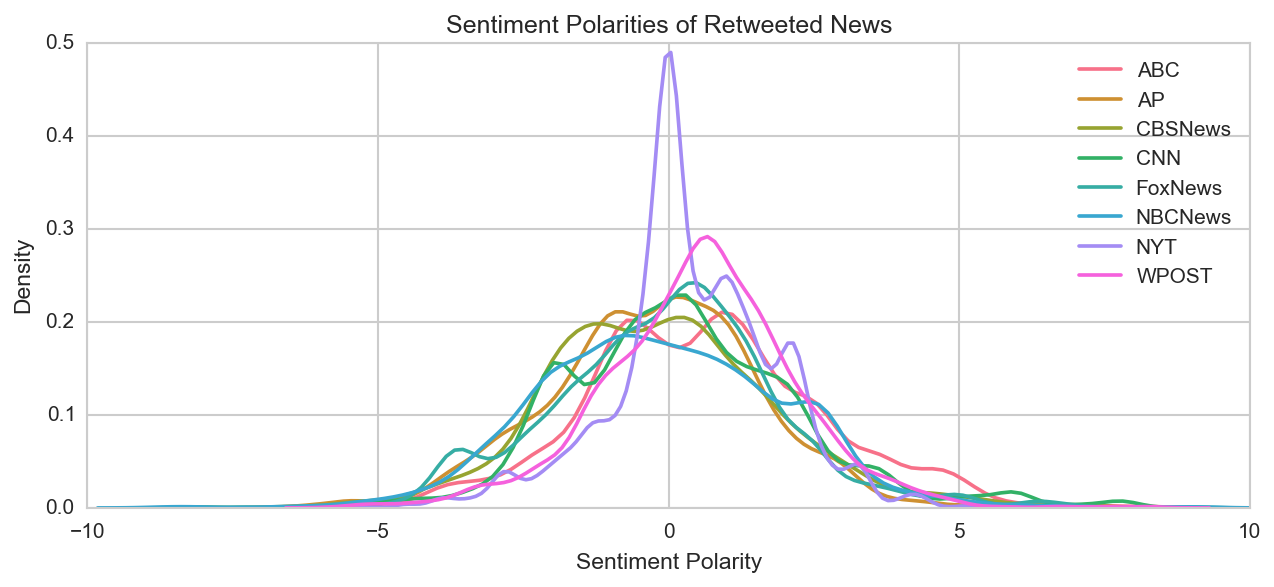

In [18]:
df = rn
ax = [sns.kdeplot(df[df['outlet']==o]['sp'],label=o) for o in outlets][0]
ax.set(xlim=(-10,10)) # = sns.kdeplot(df['sp'],label='Avg',color='black')
ax.set_title('Sentiment Polarities of Retweeted News')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
plt.savefig('figs/sentiment-retweeted.png',bbox_inches='tight')

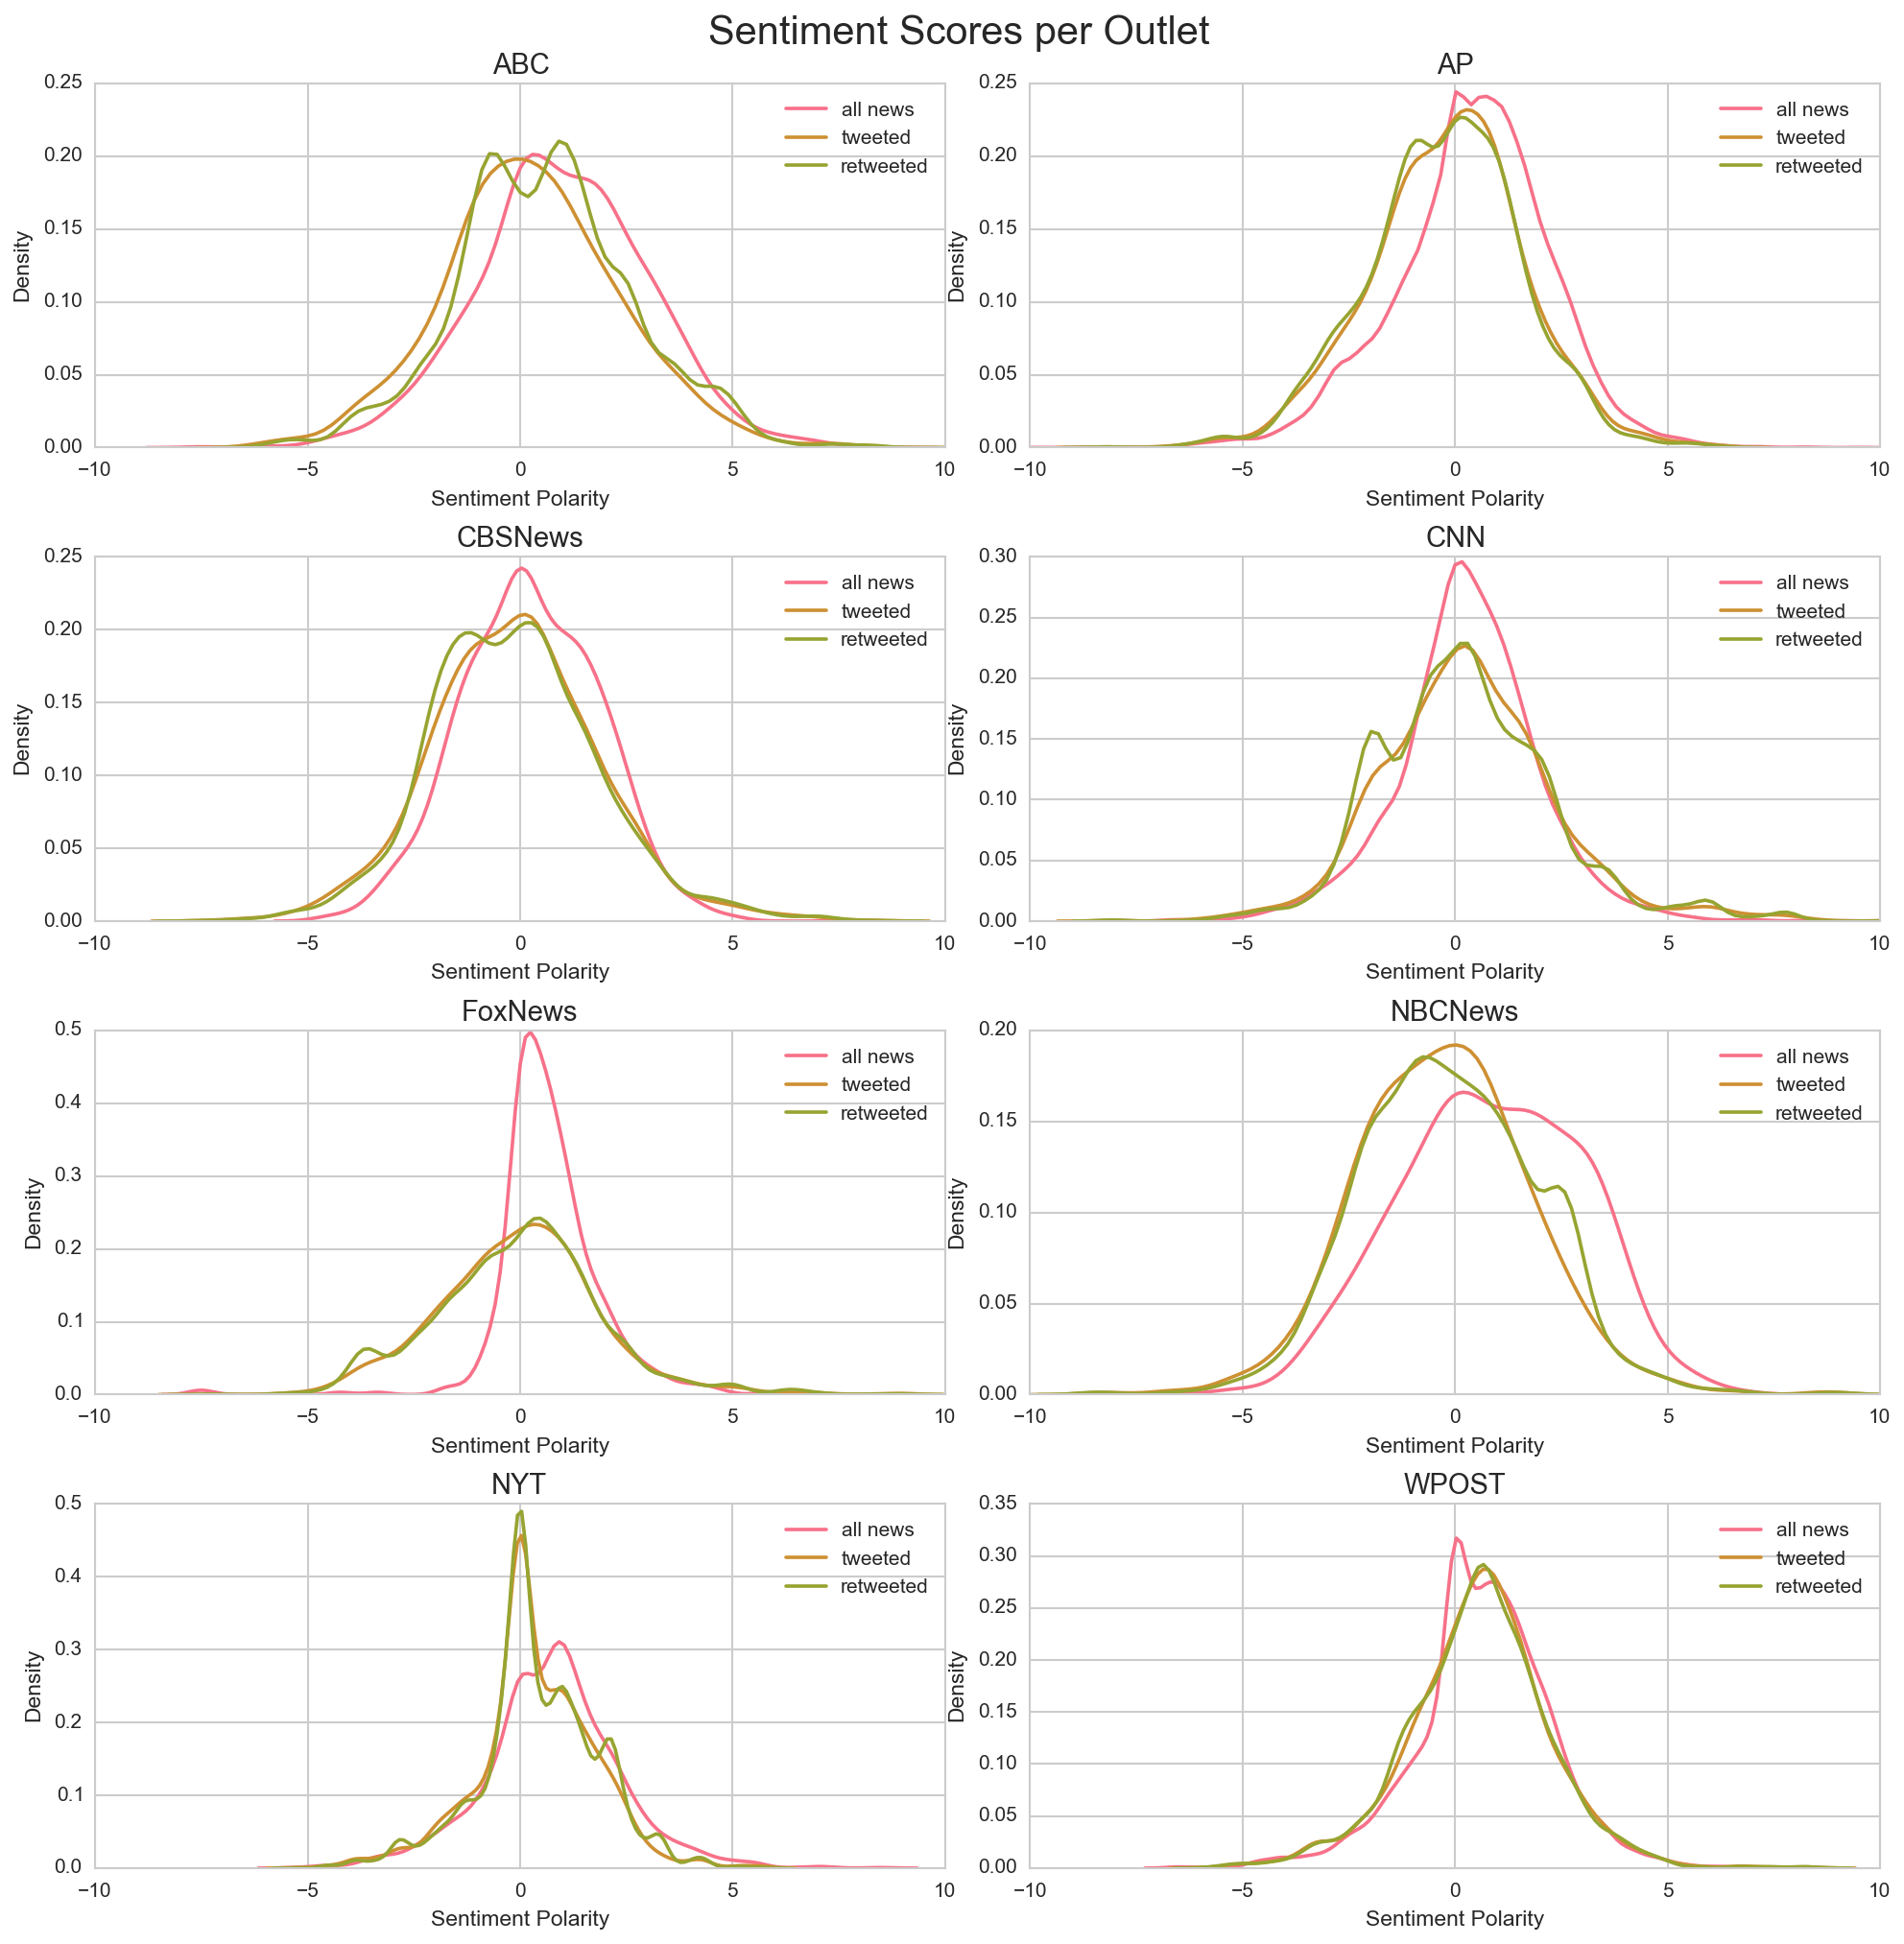

In [20]:
# Each outlet in a separate plot
f,axes = plt.subplots(nrows=4,ncols=2,figsize=(16,16),subplot_kw={'xlim': (-10,10)});#,sharex=True,sharey=True
#f.tight_layout(h_pad=4,rect=(0,0,1,0.97))
plt.subplots_adjust(hspace=0.3,wspace=0.1)
for i,o in enumerate(outlets):
    ax = axes[i/2][i%2]
    ax.set_title(o,fontsize=14)
    ax.set_xlabel('Sentiment Polarity')
    ax.set_ylabel('Density')
    sns.kdeplot(pn[pn['outlet']==o]['sp'],label='all news',ax=ax)
    sns.kdeplot(tn[tn['outlet']==o]['sp'],label='tweeted',ax=ax)
    sns.kdeplot(rn[rn['outlet']==o]['sp'],label='retweeted',ax=ax)
f.suptitle('Sentiment Scores per Outlet', fontsize=20,y=0.93)
plt.savefig('figs/sentiment-per-outlet.png',bbox_inches='tight')

In [27]:
df = pd.pivot_table(pn,index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Published'})
df = df.join(pd.pivot_table(tn,index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Tweeted'}))
df = df.join(pd.pivot_table(rn,index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Retweeted'}))
df

,Published,Tweeted,Retweeted
outlet,,,
ABC,0.997326,0.291426,0.606450
AP,0.409545,-0.179879,-0.265760
CBSNews,0.247449,-0.114050,-0.135188
CNN,0.321695,0.322969,0.254135
FoxNews,0.712249,-0.029792,-0.021365
NBCNews,0.860164,-0.265031,-0.110592
NYT,0.756503,0.355774,0.427733
WPOST,0.653282,0.564128,0.538118


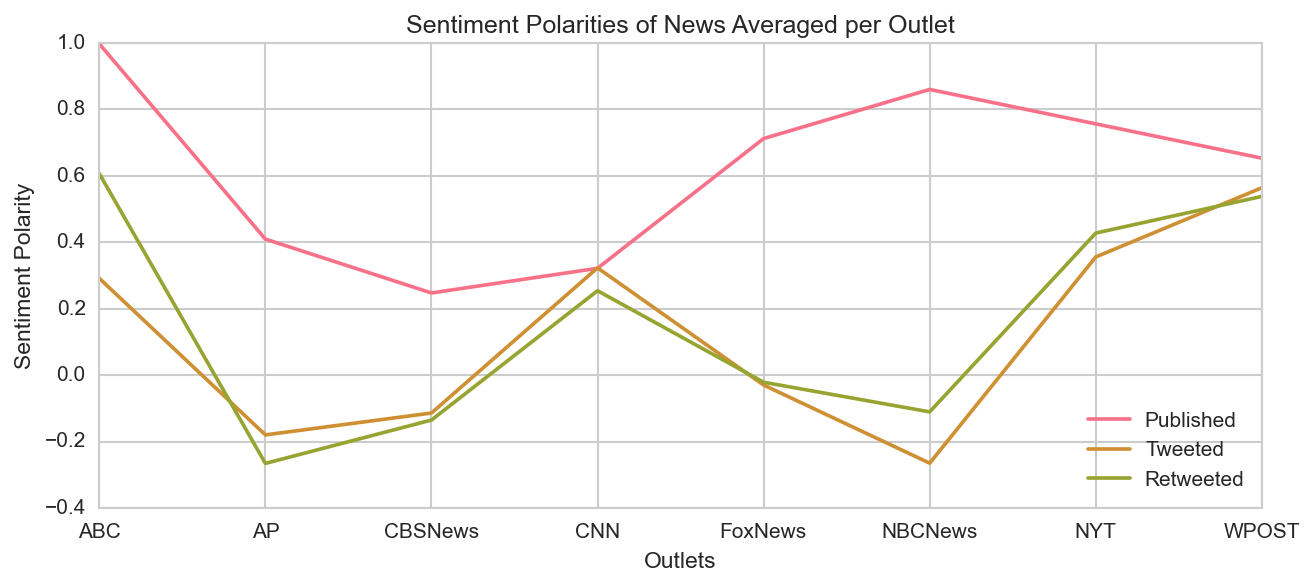

In [28]:
ax = df.plot()
ax.set_title('Sentiment Polarities of News Averaged per Outlet')
ax.set_ylabel('Sentiment Polarity')
ax.set_xlabel('Outlets')
plt.savefig('figs/sentiment-averages-per-outlet.png',bbox_inches='tight')

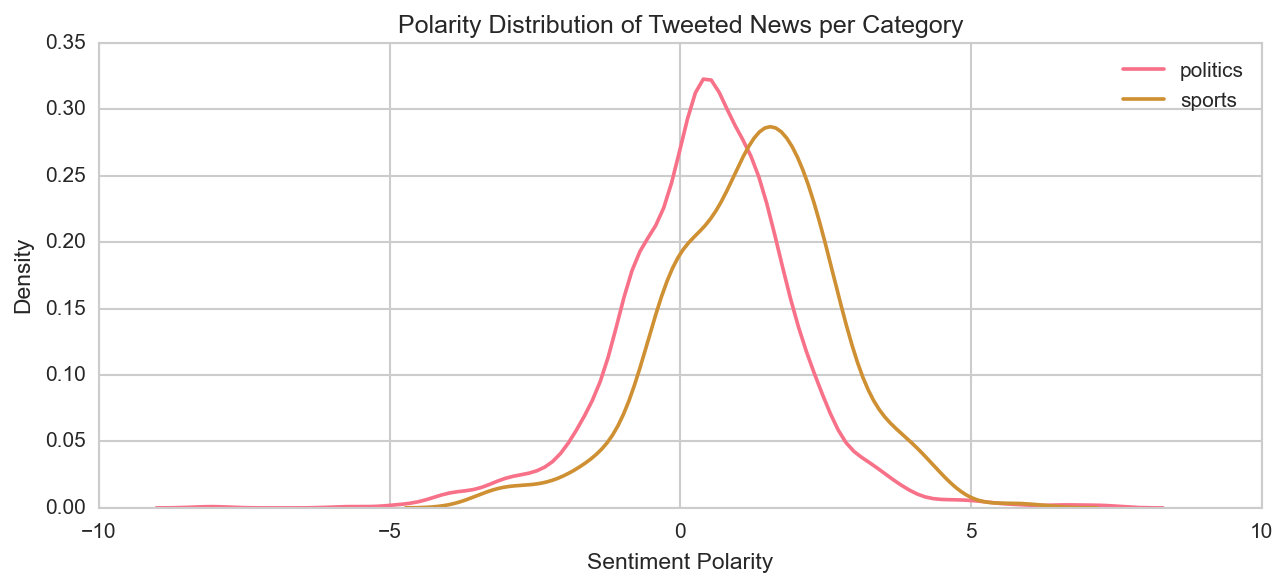

In [29]:
cs = ['politics','sports']#,'world'
ax = [sns.kdeplot(tn[tn['cat']==c]['sp'],label=c) for c in cs][0]
ax.set_title('Polarity Distribution of Tweeted News per Category')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
fname= '-'.join(cs)
plt.savefig('figs/tweeted-'+fname+'.png',bbox_inches='tight')

In [25]:
outlets.remove('AP')
outlets.remove('CBSNews')

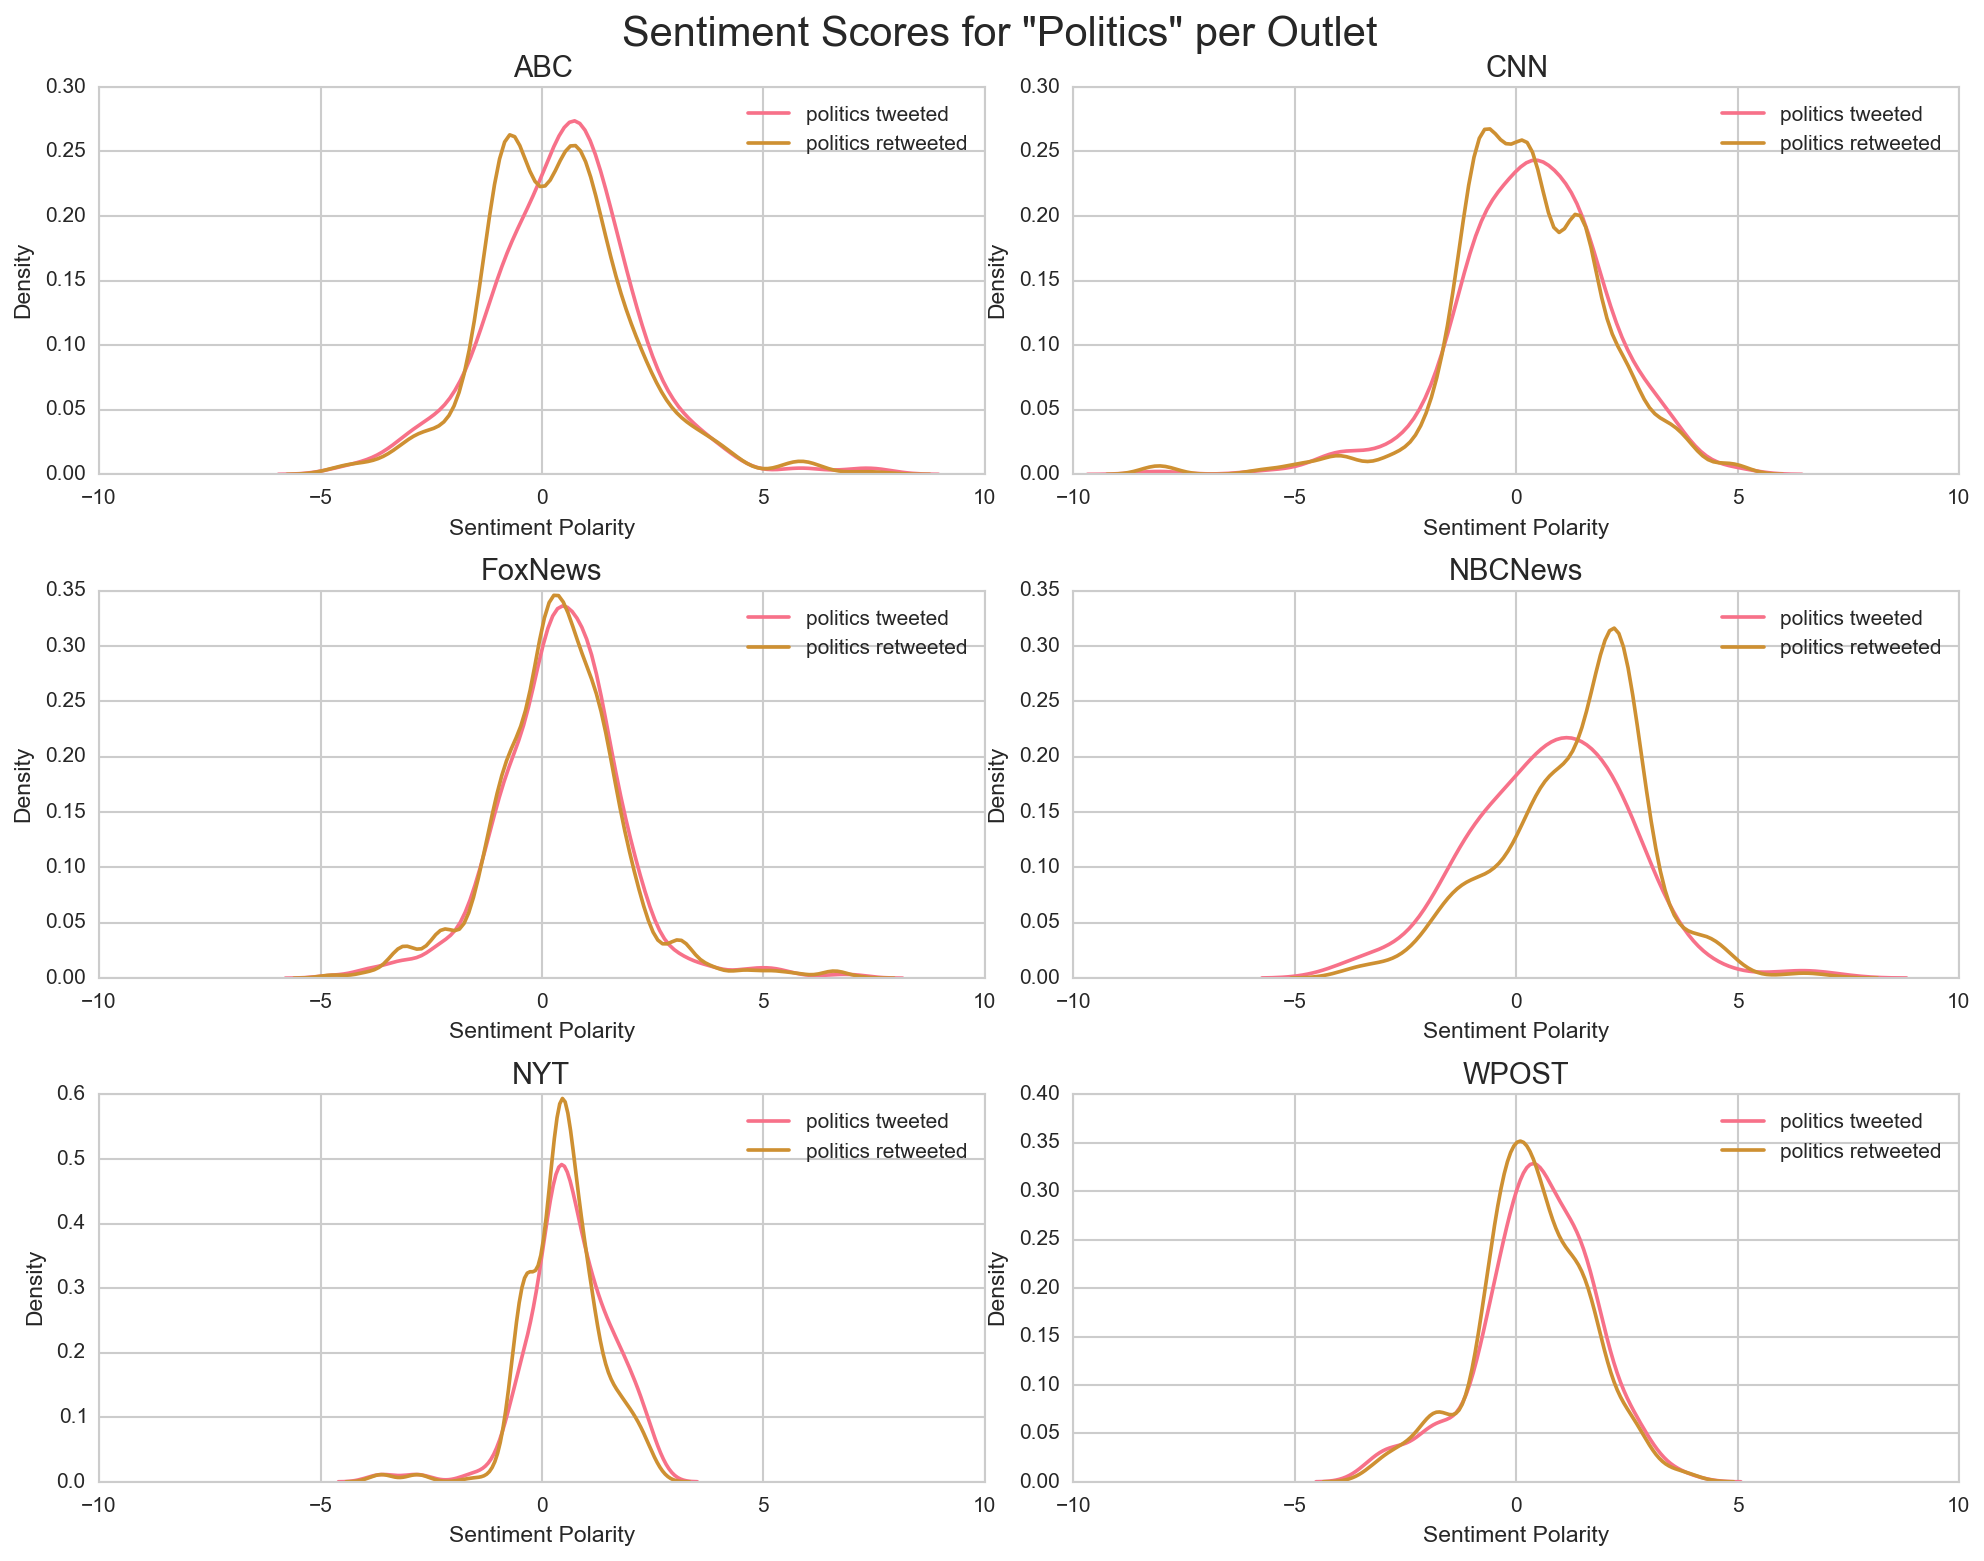

In [45]:
splim=(-10, 10)
sns.mpl.rc("figure", figsize=(10,4))
c='politics'
f,axes = plt.subplots(nrows=3,ncols=2,figsize=(16,12),subplot_kw={'xlim': splim});#,sharex=True,sharey=True
plt.subplots_adjust(hspace=0.3,wspace=0.1)
for i,o in enumerate(outlets):
    ax = axes[i/2][i%2]
    ax.set_title(o,fontsize=14)
    ax.set_xlabel('Sentiment Polarity')
    ax.set_ylabel('Density')
    tw = tn[(tn['cat']==c) & (tn['outlet']==o)]['sp']
    rt = rn[(rn['cat']==c) & (rn['outlet']==o)]['sp']
    sns.kdeplot(tw,label=c+' tweeted',ax=ax)
    sns.kdeplot(rt,label=c+' retweeted',ax=ax)
f.suptitle('Sentiment Scores for "Politics" per Outlet', fontsize=20,y=0.94)
plt.savefig('figs/politics-per-outlet.png',bbox_inches='tight')

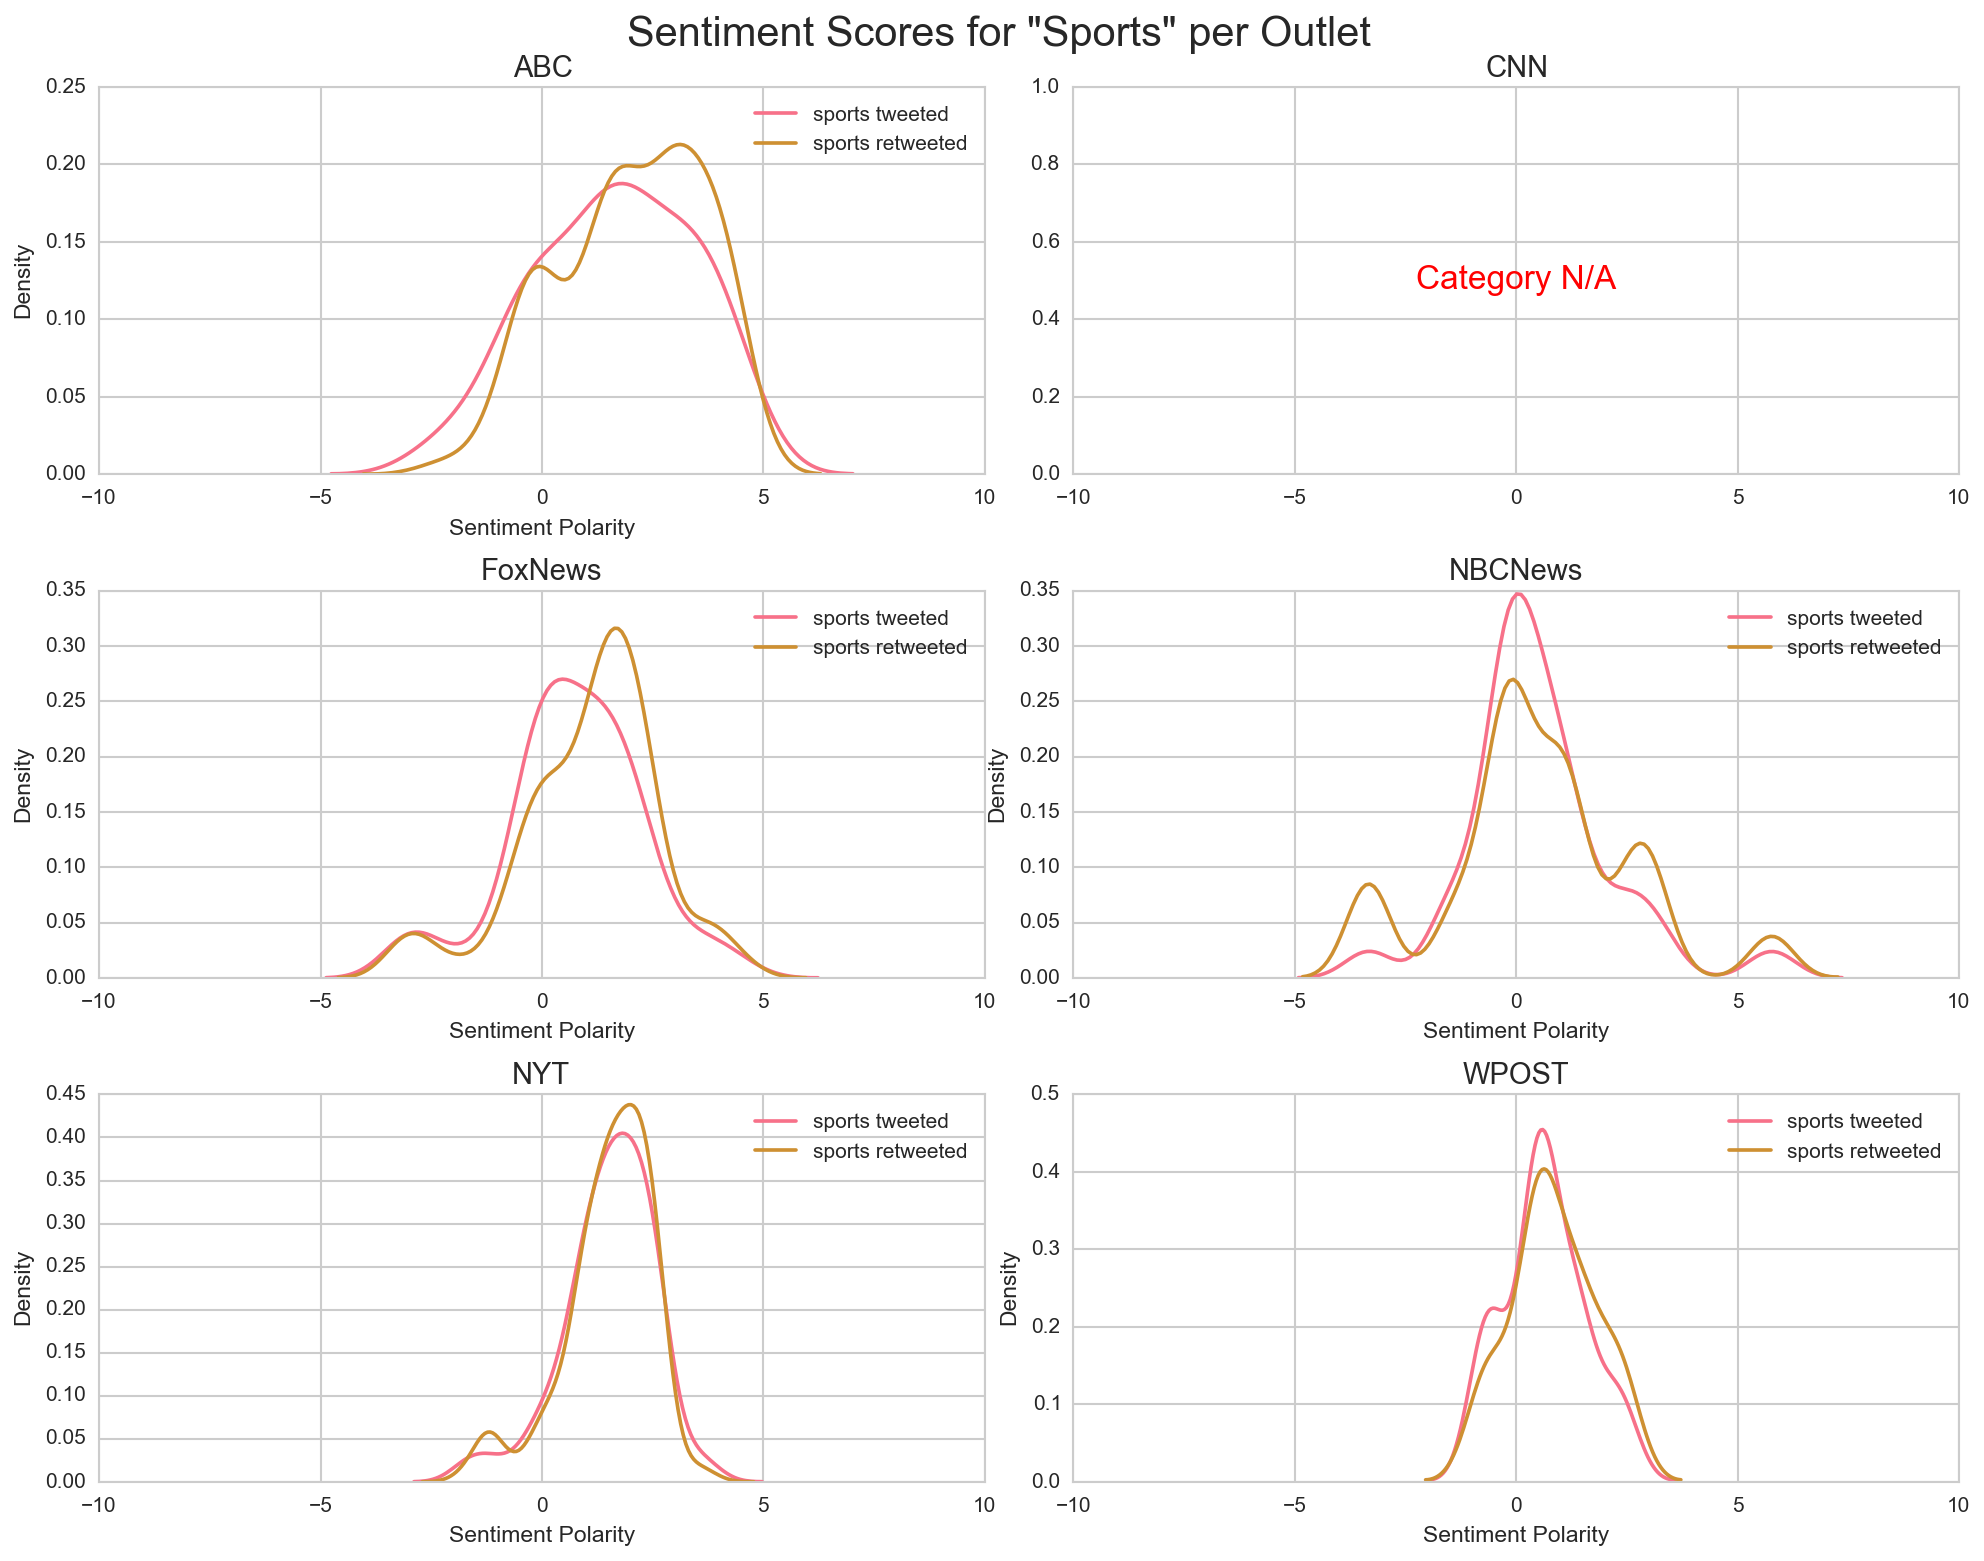

In [36]:
splim=(-10, 10)
sns.mpl.rc("figure", figsize=(10,4))
c='sports'
f,axes = plt.subplots(nrows=3,ncols=2,figsize=(16,12),subplot_kw={'xlim': splim});#,sharex=True,sharey=True
plt.subplots_adjust(hspace=0.3,wspace=0.1)
for i,o in enumerate(outlets):
    ax = axes[i/2][i%2]
    ax.set_title(o,fontsize=14)
    if o == 'CNN':
        ax.text(0.5, 0.5, 'Category N/A',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=16, color='red',
        transform=ax.transAxes)
        continue
    ax.set_xlabel('Sentiment Polarity')
    ax.set_ylabel('Density')
    tw = tn[(tn['cat']==c) & (tn['outlet']==o)]['sp']
    rt = rn[(rn['cat']==c) & (rn['outlet']==o)]['sp']
    sns.kdeplot(tw,label=c+' tweeted',ax=ax)
    sns.kdeplot(rt,label=c+' retweeted',ax=ax)
f.suptitle('Sentiment Scores for "Sports" per Outlet', fontsize=20,y=0.94)
plt.savefig('figs/sports-per-outlet.png',bbox_inches='tight')

In [43]:
c = 'politics'
df = pd.pivot_table(tn[tn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Tweeted'})
df = df.join(pd.pivot_table(rn[rn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Retweeted'}))
df

,Tweeted,Retweeted
outlet,,
ABC,0.487771,0.350096
CNN,0.343498,0.225534
FoxNews,0.427515,0.361404
NBCNews,0.772692,1.298688
NYT,0.626607,0.477398
WPOST,0.452950,0.346996


In [42]:
c = 'sports'
df = pd.pivot_table(tn[tn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Tweeted'})
df = df.join(pd.pivot_table(rn[rn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Retweeted'}))
df

,Tweeted,Retweeted
outlet,,
ABC,1.640385,2.019516
FoxNews,0.744167,1.091956
NBCNews,0.516452,0.525119
NYT,1.514815,1.500037
WPOST,0.653333,0.846667


In [44]:
#Any correlation between polarity of the tweet text and retweeting?
tn[['rt','sp','sp_t']].corr()

,rt,sp,sp_t
rt,1.000000,0.027986,0.021765
sp,0.027986,1.000000,0.423483
sp_t,0.021765,0.423483,1.000000
